<a href="https://colab.research.google.com/github/saishree2004/Data_Science_and_Algorithms/blob/main/DSA_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
feature_names = diabetes.feature_names

In [3]:
print(feature_names)



['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [4]:
# Convert to DataFrame for easy handling
import pandas as pd
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


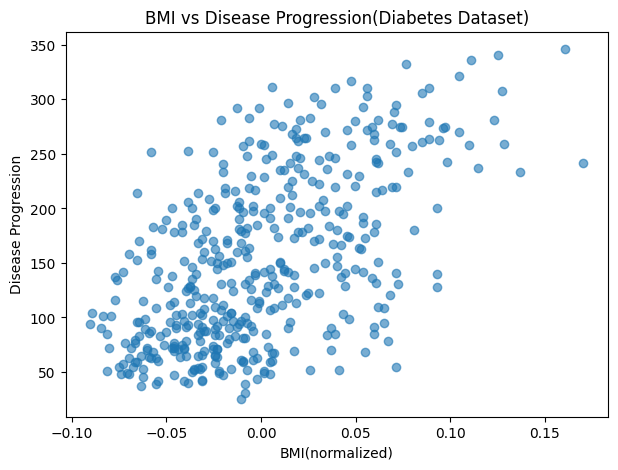

In [5]:
plt.figure(figsize=(7, 5))
plt.scatter(df['bmi'], df['target'], alpha=0.6)
plt.xlabel('BMI(normalized)')
plt.ylabel('Disease Progression')
plt.title('BMI vs Disease Progression(Diabetes Dataset)')
plt.show()

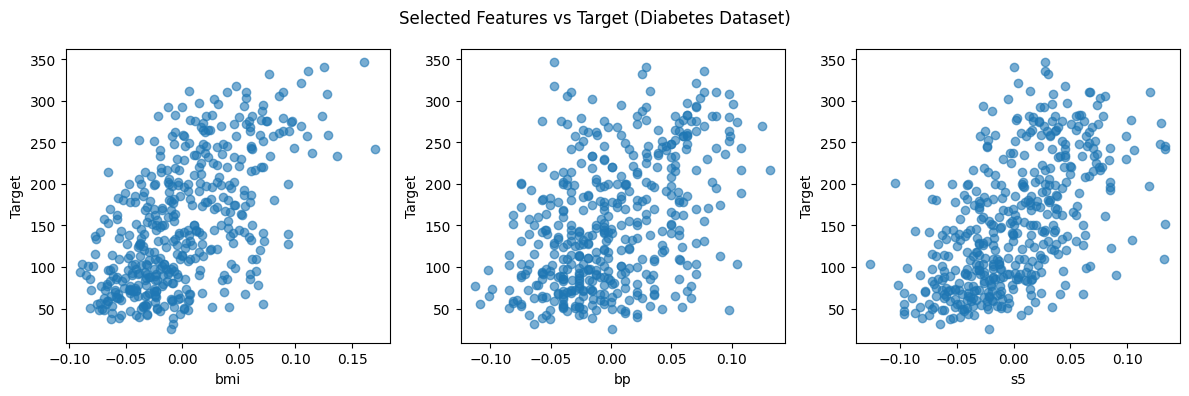

In [6]:
features_to_plot = ['bmi', 'bp', 's5']

plt.figure(figsize=(12, 4))

for i, feature in enumerate(features_to_plot):
  plt.subplot(1, 3, i+1)
  plt.scatter(df[feature], df['target'], alpha=0.6)
  plt.xlabel(feature)
  plt.ylabel('Target')

plt.suptitle("Selected Features vs Target (Diabetes Dataset)")
plt.tight_layout()
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
#Kernel Ridge model
krr=KernelRidge(
    kernel='rbf',
    gamma=0.1,
    alpha=1.0)

#Train
krr.fit(X_train_scaled,y_train)

#Predict
y_pred=krr.predict(X_test_scaled)

In [10]:
print("MSE:",mean_squared_error(y_test,y_pred))
print("R2:",r2_score(y_test,y_pred))

MSE: 2850.841915875676
R2: 0.4619176552136569
